In [1]:
import boulderopal as bo
import matplotlib.pyplot as plt
import numpy as np
import qctrlvisualizer as qv
import qutip as qt

bo.cloud.set_organization("qiqb")

In [2]:
gate_duration = 100e-9  # s
segment_count = 10

transmon_dimension = 2
Omega_max = 2 * np.pi * 20e6  # rad.Hz

transmons = [
    bo.superconducting.Transmon(
        frequency=0,
        dimension=transmon_dimension,
        drive=bo.superconducting.ComplexOptimizableSignal(segment_count, Omega_max),
        name="Q11",
    ),
    bo.superconducting.Transmon(
        frequency=-2 * np.pi * 2e6,  # rad.Hz
        dimension=transmon_dimension,
        name="Q14",
    ),
]

interaction = bo.superconducting.TransmonTransmonInteraction(
    transmon_names=("Q11", "Q14"),
    effective_coupling=2 * np.pi * 10e6,  # rad.Hz
)

In [3]:
ground_state = qt.basis(2, 0)
initial_state = qt.tensor(ground_state, ground_state)
initial_state = initial_state.full().squeeze()
initial_state

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

## $X \otimes I$

In [4]:
I = qt.qeye(2)
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
RX_90 = qt.rx(np.pi / 2)

target_unitary = qt.tensor(X, I)
target_unitary = target_unitary.full()
target_unitary

/var/folders/_n/h_vxv1pj18l08d2jsrv3rfv40000gn/T/ipykernel_6928/3394113904.py:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  RX_90 = qt.rx(np.pi / 2)


array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
optimization_result = bo.superconducting.optimize(
    transmons=transmons,
    cavities=[],
    interactions=[interaction],
    gate_duration=gate_duration,
    initial_state=initial_state,
    target_operation=target_unitary,
    cost_history_scope="ITERATION_VALUES",
)

Your task (action_id="1928442") has started.
Your task (action_id="1928442") has completed.


In [6]:
optimization_result

{'cost': 7.233547094642745e-11,
 'output': {'Q11.drive': {'values': array([-2.17784157e+06 +1456205.96597361j,
          -1.07050644e+08-22333948.1591267j ,
           9.07176613e+07 +6755526.15866525j,
          -0.00000000e+00       -0.j        ,
           1.10505960e+08+52695094.01733374j,
           9.26494580e+07-44986215.11299064j,
           1.07558330e+08+19777915.5477654j ,
          -4.46545549e+07+54838468.6209584j ,
          -1.19760534e+08-38030020.79316584j,
           6.00613730e+07-46952532.87067636j]),
   'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
          1.e-08, 1.e-08]),
   'time_dimension': 0},
  'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
           [ 0.00000000e+00+0.00000000e+00j,
             1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+

In [7]:
print("Optimized cost:\t", optimization_result["cost"])

Optimized cost:	 7.233547094642745e-11


In [8]:
optimization_result["output"]

{'Q11.drive': {'values': array([-2.17784157e+06 +1456205.96597361j,
         -1.07050644e+08-22333948.1591267j ,
          9.07176613e+07 +6755526.15866525j,
         -0.00000000e+00       -0.j        ,
          1.10505960e+08+52695094.01733374j,
          9.26494580e+07-44986215.11299064j,
          1.07558330e+08+19777915.5477654j ,
         -4.46545549e+07+54838468.6209584j ,
         -1.19760534e+08-38030020.79316584j,
          6.00613730e+07-46952532.87067636j]),
  'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
         1.e-08, 1.e-08]),
  'time_dimension': 0},
 'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 

In [9]:
print(
    f"Optimized infidelity: {optimization_result['output']['infidelity']['value']:.3e}"
)

Optimized infidelity: 7.234e-11


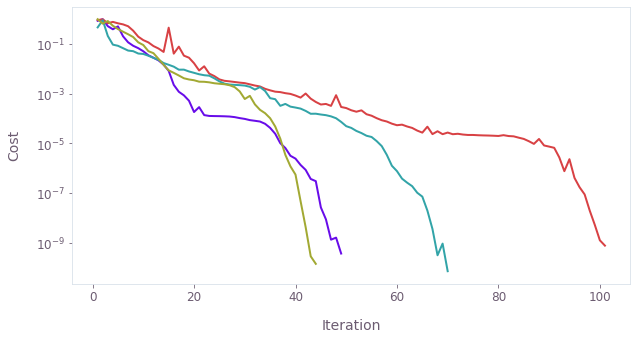

In [10]:
qv.plot_cost_histories(
    optimization_result["cost_history"]["iteration_values"], y_axis_log=True
)

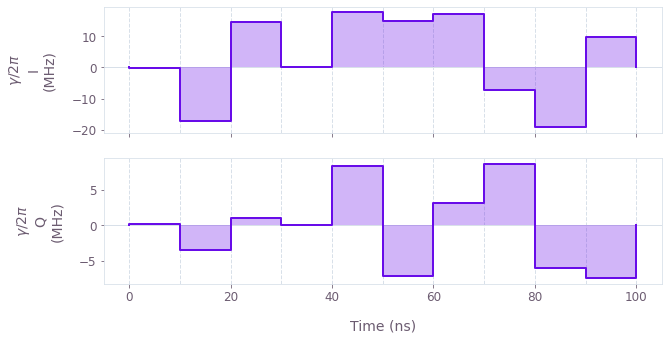

In [11]:
qv.plot_controls(
    {
        "$\\gamma$": optimization_result["output"]["Q11.drive"],
    },
    polar = False,
    figure = plt.figure(figsize = (8, 6)),
)

In [12]:
state_evolution = optimization_result["output"]["state_evolution"]["value"]

states = np.reshape(state_evolution, [-1, transmon_dimension, transmon_dimension])
states[0]

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [13]:
population_00 = np.abs(states[:, 0, 0]) ** 2
population_01 = np.abs(states[:, 0, 1]) ** 2
population_10 = np.abs(states[:, 1, 0]) ** 2
population_11 = np.abs(states[:, 1, 1]) ** 2

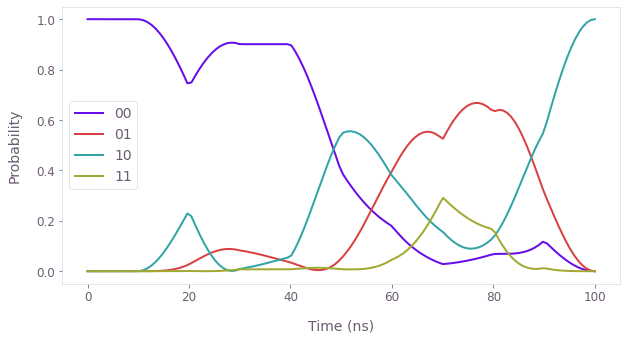

In [14]:
qv.plot_population_dynamics(
    optimization_result["output"]["sample_times"]["value"],
    {
        "00": population_00,
        "01": population_01,
        "10": population_10,
        "11": population_11,
    },
)

## $R_x(\frac{\pi}{2}) \otimes I$

In [15]:
I = qt.qeye(2)
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
RX_90 = qt.rx(np.pi / 2)

target_unitary = qt.tensor(RX_90, I)
target_unitary = target_unitary.full()
target_unitary

/var/folders/_n/h_vxv1pj18l08d2jsrv3rfv40000gn/T/ipykernel_6928/4067474532.py:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  RX_90 = qt.rx(np.pi / 2)


array([[0.70710678+0.j        , 0.        +0.j        ,
        0.        -0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.70710678+0.j        ,
        0.        +0.j        , 0.        -0.70710678j],
       [0.        -0.70710678j, 0.        +0.j        ,
        0.70710678+0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        -0.70710678j,
        0.        +0.j        , 0.70710678+0.j        ]])

In [16]:
optimization_result = bo.superconducting.optimize(
    transmons=transmons,
    cavities=[],
    interactions=[interaction],
    gate_duration=gate_duration,
    initial_state=initial_state,
    target_operation=target_unitary,
    cost_history_scope="ITERATION_VALUES",
)

Your task (action_id="1928443") has started.
Your task (action_id="1928443") has completed.


In [17]:
optimization_result

{'cost': 1.4001000359087357e-10,
 'output': {'Q11.drive': {'values': array([ 6.29982130e+07-2.35166455e+07j, -3.21073667e+07+1.07524547e+08j,
          -1.18922223e+08-4.33835446e+06j,  7.63509083e+07-5.83075804e+07j,
          -3.76013268e+06+5.67783274e+06j, -8.65647181e+07+7.33526708e+07j,
          -8.93516884e+07+5.12604395e+07j,  3.39252488e+05+1.31920180e+05j,
           9.65232149e+07-5.83000012e+07j, -2.40276417e+07+1.02444098e+08j]),
   'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
          1.e-08, 1.e-08]),
   'time_dimension': 0},
  'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
           [ 0.00000000e+00+0.00000000e+00j,
             1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
           [ 0.00000000e+00+

In [18]:
print("Optimized cost:\t", optimization_result["cost"])

Optimized cost:	 1.4001000359087357e-10


In [19]:
optimization_result["output"]

{'Q11.drive': {'values': array([ 6.29982130e+07-2.35166455e+07j, -3.21073667e+07+1.07524547e+08j,
         -1.18922223e+08-4.33835446e+06j,  7.63509083e+07-5.83075804e+07j,
         -3.76013268e+06+5.67783274e+06j, -8.65647181e+07+7.33526708e+07j,
         -8.93516884e+07+5.12604395e+07j,  3.39252488e+05+1.31920180e+05j,
          9.65232149e+07-5.83000012e+07j, -2.40276417e+07+1.02444098e+08j]),
  'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
         1.e-08, 1.e-08]),
  'time_dimension': 0},
 'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,

In [20]:
print(
    f"Optimized infidelity: {optimization_result['output']['infidelity']['value']:.3e}"
)

Optimized infidelity: 1.400e-10


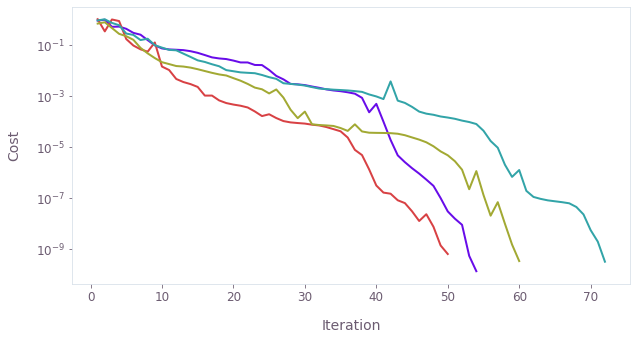

In [21]:
qv.plot_cost_histories(
    optimization_result["cost_history"]["iteration_values"], y_axis_log=True
)

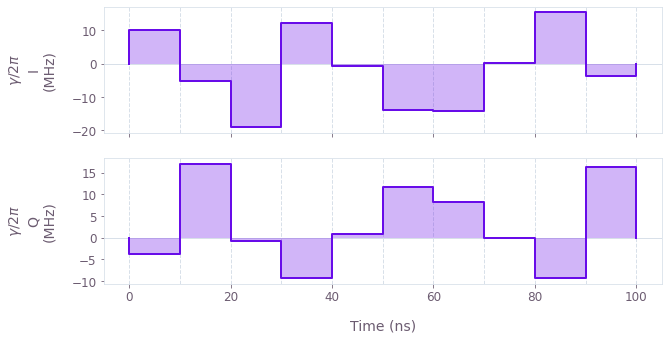

In [22]:
qv.plot_controls(
    {
        "$\\gamma$": optimization_result["output"]["Q11.drive"],
    },
    polar = False,
    figure = plt.figure(figsize = (8, 6)),
)

In [23]:
state_evolution = optimization_result["output"]["state_evolution"]["value"]

states = np.reshape(state_evolution, [-1, transmon_dimension, transmon_dimension])
states[0]

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [24]:
population_00 = np.abs(states[:, 0, 0]) ** 2
population_01 = np.abs(states[:, 0, 1]) ** 2
population_10 = np.abs(states[:, 1, 0]) ** 2
population_11 = np.abs(states[:, 1, 1]) ** 2

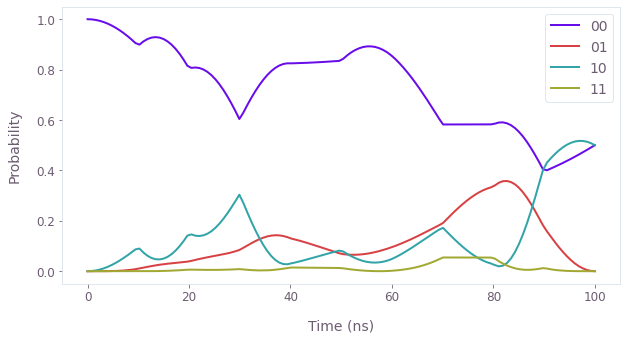

In [25]:
qv.plot_population_dynamics(
    optimization_result["output"]["sample_times"]["value"],
    {
        "00": population_00,
        "01": population_01,
        "10": population_10,
        "11": population_11,
    },
)

## $Z \otimes R_x(\frac{\pi}{2})$

In [26]:
I = qt.qeye(2)
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
RX_90 = qt.rx(np.pi / 2)

target_unitary = qt.tensor(Z, RX_90)
target_unitary = target_unitary.full()
target_unitary

/var/folders/_n/h_vxv1pj18l08d2jsrv3rfv40000gn/T/ipykernel_6928/3156397199.py:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  RX_90 = qt.rx(np.pi / 2)


array([[ 0.70710678+0.j        ,  0.        -0.70710678j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        -0.70710678j,  0.70710678+0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.70710678+0.j        ,  0.        +0.70710678j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.70710678j, -0.70710678+0.j        ]])

In [27]:
optimization_result = bo.superconducting.optimize(
    transmons=transmons,
    cavities=[],
    interactions=[interaction],
    gate_duration=gate_duration,
    initial_state=initial_state,
    target_operation=target_unitary,
    cost_history_scope="ITERATION_VALUES",
)

Your task (action_id="1928444") has started.
Your task (action_id="1928444") has completed.


In [28]:
optimization_result

{'cost': 0.5000000001934699,
 'output': {'Q11.drive': {'values': array([ 4.88306202e+07+7.24354386e+07j, -8.55855966e+07+4.13320034e+07j,
           3.43805137e+07-9.49070798e+07j,  3.11135103e+07-5.15199480e+07j,
          -1.68264914e+04-5.96840332e+04j, -2.61977702e+06+6.87257049e+06j,
           6.11630556e+07+6.92587906e+07j, -4.38198237e+07+9.46869982e+07j,
           3.01570605e+07+1.09989783e+08j, -6.60904007e+07+2.30972258e+07j]),
   'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
          1.e-08, 1.e-08]),
   'time_dimension': 0},
  'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
           [ 0.00000000e+00+0.00000000e+00j,
             1.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j,
             0.00000000e+00+0.00000000e+00j],
           [ 0.00000000e+00+0.00

In [29]:
print("Optimized cost:\t", optimization_result["cost"])

Optimized cost:	 0.5000000001934699


In [30]:
optimization_result["output"]

{'Q11.drive': {'values': array([ 4.88306202e+07+7.24354386e+07j, -8.55855966e+07+4.13320034e+07j,
          3.43805137e+07-9.49070798e+07j,  3.11135103e+07-5.15199480e+07j,
         -1.68264914e+04-5.96840332e+04j, -2.61977702e+06+6.87257049e+06j,
          6.11630556e+07+6.92587906e+07j, -4.38198237e+07+9.46869982e+07j,
          3.01570605e+07+1.09989783e+08j, -6.60904007e+07+2.30972258e+07j]),
  'durations': array([1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
         1.e-08, 1.e-08]),
  'time_dimension': 0},
 'unitaries': {'value': array([[[ 1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            1.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j],
          [ 0.00000000e+00+0.00000000e+00j,
            0.00000000e+00+0.00000000e+00j,

In [31]:
print(
    f"Optimized infidelity: {optimization_result['output']['infidelity']['value']:.3e}"
)

Optimized infidelity: 5.000e-01


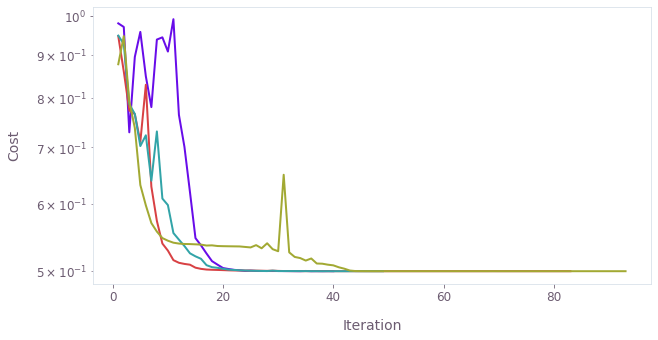

In [32]:
qv.plot_cost_histories(
    optimization_result["cost_history"]["iteration_values"], y_axis_log=True
)

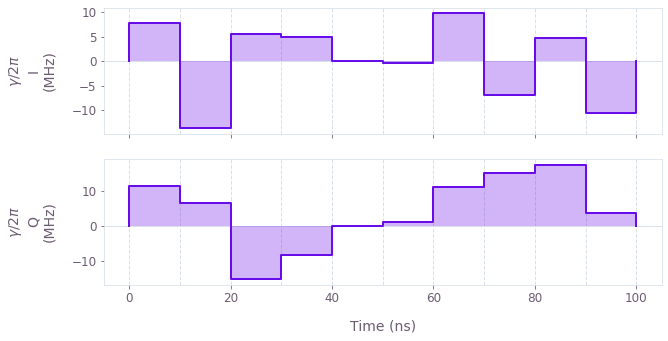

In [33]:
qv.plot_controls(
    {
        "$\\gamma$": optimization_result["output"]["Q11.drive"],
    },
    polar = False,
    figure = plt.figure(figsize = (8, 6)),
)

In [34]:
state_evolution = optimization_result["output"]["state_evolution"]["value"]

states = np.reshape(state_evolution, [-1, transmon_dimension, transmon_dimension])
states[0]

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [35]:
population_00 = np.abs(states[:, 0, 0]) ** 2
population_01 = np.abs(states[:, 0, 1]) ** 2
population_10 = np.abs(states[:, 1, 0]) ** 2
population_11 = np.abs(states[:, 1, 1]) ** 2

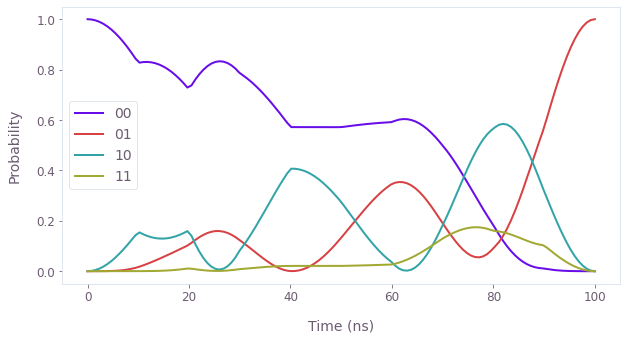

In [36]:
qv.plot_population_dynamics(
    optimization_result["output"]["sample_times"]["value"],
    {
        "00": population_00,
        "01": population_01,
        "10": population_10,
        "11": population_11,
    },
)

In [63]:
U = optimization_result["output"]["unitaries"]["value"][-1]
CR = qt.Qobj(U).tidyup(1e-3)
CR

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.        +0.j          0.58778171-0.80901957j  0.        +0.j
   0.        +0.j        ]
 [ 0.58777733-0.80902275j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.58779317+0.80901124j]
 [ 0.        +0.j          0.        +0.j         -0.5877888 +0.80901442j
   0.        +0.j        ]]

In [64]:
CR * qt.basis(4, 0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.        +0.j        ]
 [0.58777733-0.80902275j]
 [0.        +0.j        ]
 [0.        +0.j        ]]

In [65]:
CR * qt.basis(4, 2)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.       +0.j        ]
 [ 0.       +0.j        ]
 [ 0.       +0.j        ]
 [-0.5877888+0.80901442j]]